In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import root_mean_squared_error

In [2]:
df = pd.read_parquet('../data/final/2023_data.parquet')

In [3]:
categorical = ['date', 'dayofweek', 'away_team', 'away_league', 'home_team', 'home_league', 'park_id', 'away_P_id', 'home_P_id']
numerical = ['home_OPS_blend', 'home_FIP_blend', 'home_FPCT_blend', 'away_OPS_blend', 'away_FIP_blend', 'away_FPCT_blend']
target = ['home_won']

In [14]:
df_cat = df[categorical]
vec = DictVectorizer(sparse=False)
X_cat = vec.fit_transform(df_cat.to_dict(orient='records'))
cat_features = vec.get_feature_names_out()

In [9]:
df_num = df[numerical]
scaler = StandardScaler()
X_num = scaler.fit_transform(df_num)

In [10]:
X = np.hstack([X_num, X_cat])

In [11]:
y = df[target]

In [12]:
model = LogisticRegression()
model.fit(X, y)

/workspaces/saber-metrics-machine-learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
feature_names = list(numerical) + list(cat_features)

In [16]:
importance = pd.Series(abs(model.coef_[0]), index=feature_names)
importance = importance.sort_values(ascending=False)
print(importance)

date                  4.152108e-09
home_OPS_blend        1.162680e-15
away_OPS_blend        1.118324e-15
home_FIP_blend        5.844277e-16
away_FIP_blend        5.718420e-16
                          ...     
away_P_id=kuhlc001    3.382337e-19
home_P_id=velav001    3.382337e-19
home_P_id=plesz001    3.382337e-19
away_P_id=mahlt001    3.382336e-19
home_P_id=overc001    3.382336e-19
Length: 793, dtype: float64


In [17]:
importance[importance > 0.001]

Series([], dtype: float64)

In [18]:
from sklearn.metrics import root_mean_squared_error
y_prob = model.predict_proba(X)[:, 1]
rmse = root_mean_squared_error(y, y_prob)

In [19]:
rmse

0.49955932484985976

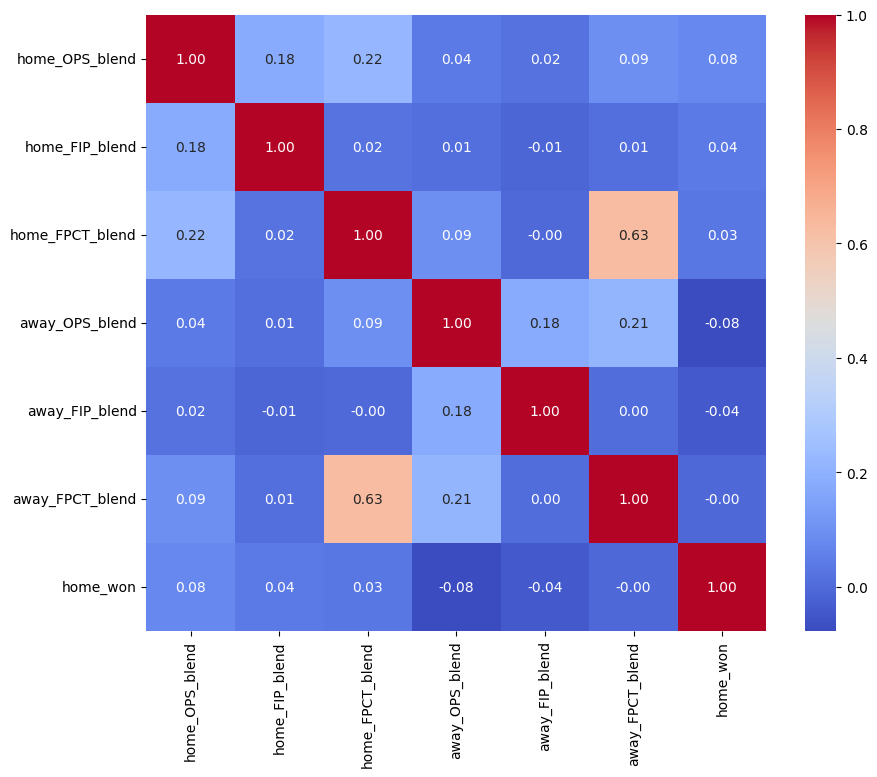

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[numerical+target].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [25]:
vec = DictVectorizer(sparse=False)
X_train = vec.fit_transform(df[categorical+numerical].to_dict(orient='records'))
all_features = vec.get_feature_names_out()

In [26]:
y_train = df[target]

In [27]:
rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=5,
        random_state=42,
        n_jobs=-1)

In [28]:
rf.fit(X_train, y_train)

/workspaces/saber-metrics-machine-learning/.venv/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
importances = rf.feature_importances_

In [30]:
y_pred = rf.predict(X_train)
rmse = root_mean_squared_error(y_train, y_pred)
rmse

0.615973918532885

In [31]:
feat_imp = pd.DataFrame({'feature': all_features, 'importance': importances})
feat_imp = feat_imp.sort_values('importance', ascending=False)

In [32]:
feat_imp.head(10)

,feature,importance
2,away_OPS_blend,0.058989
397,home_OPS_blend,0.054439
396,home_FPCT_blend,0.040863
1,away_FPCT_blend,0.040793
395,home_FIP_blend,0.037444
0,away_FIP_blend,0.032239
387,date,0.024157
781,park_id=OAK01,0.022891
369,away_team=KCA,0.020106
366,away_team=COL,0.018265
